Optimizing City Parking with Sensor Data Analytics

#### Authored by: SimranJit Singh
#### Duration: 120 mins
#### Level: Intermediate
#### Pre-requisite Skills: Python

Scenario

In an effort to streamline urban parking and alleviate congestion, a sophisticated analysis of the "on-street-parking-bay-sensors" dataset is underway. This initiative aims to unveil the intricacies of parking space utilization throughout the city, pinpointing the frequency of occupied spots, discerning patterns in parking duration, and identifying high-demand zones. By integrating location coordinates, we can instantaneously determine the availability of parking spaces, thus empowering drivers with real-time information. Simultaneously, a deep dive into time-based trends will reveal peak occupancy periods, guiding effective traffic and urban planning strategies. This endeavor not only promises enhanced efficiency for motorists seeking parking but also equips city planners with robust data to sculpt informed, future-ready transportation infrastructures.


What is the use case
:

A. Real-time analysis of parking availability using geolocation data.

B. Understanding of urban parking dynamics through occupancy trends.

C. Insights into the average duration of parking occupancy and sensor response times.

D. Spatial visualization techniques to identify areas with frequent parking status changes.

E. Strategic planning for city development based on parking zone activity levels.

F. Techniques for correlating time-related factors with parking availability.

Walkthrough Steps:

1. Import the dataset using API
2. Explore and Clean the dataset
3. Identify the most frequently occupied and Unoccupied parking locations and their peak hours.
4. Visualize occupancy trends over time with appropriate data plots.
5. Calculate and interpret response times between status changes.
6. Develop heatmaps to showcase location-based parking trends.
7. Conduct zone-specific analysis to assess parking duration in minutes.
8. Analyze and present frequency counts of parking status descriptions.
9. Perform a correlation analysis between time variables and parking occupancy.
10. Input and verify geolocation data to check current parking space status.

A Brief Introduction of the Dataset:

The dataset hails from an array of on-street parking bay sensors, meticulously recording each parking event. It encompasses a unique ID for tracking, timestamps denoting data capture and status updates, the size of the parking bay, and its last known status. Additionally, each record specifies the zone number, occupancy status, and precise geolocation. The wealth of data encapsulated within this dataset provides a granular view of the city's parking landscape, serving as a foundation for comprehensive analytical studies aimed at optimizing urban parking solutions.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

## 1. Import the dataset using API

The dataset is import using the given API and its stored in a data frame to perform the analysis. The head of the dataset is shown below. 

In [2]:
# Function that extracts the data from the JSON 
def get_data(base, data_url, offset = 0):
    
    filters = f'records?limit={100}&offset={offset}&timezone=UTC'
    url = f'{base}{data_url}/{filters}'
    result = requests.get(url)
    # if you need to extract more than 9900 records, enter the api key like below
    #result = requests.get(url + f'&apikey={API_KEY}')
    result_json = result.json()
    max_results = result_json['total_count']
    links = result_json['links']
    records = result_json['records']
    records_df = pd.json_normalize(records)
    
    # fix columns names
    records_df.drop(columns=['links'],inplace=True)
    column_names = records_df.columns.values.tolist()
    
    column_names = [i.split('.')[-1] for i in column_names]
    records_df.columns = column_names
    
    next_url = None
    
    # get next url
    if records_df.shape[0] != max_results:
        for l in links:
            if l['rel']=='next':
                next_url = l['href']
                
    return [records_df, next_url, column_names]

In [3]:
# Appends each set of data 
def add_to_dataframe(dataframe, new_data):
    df = pd.concat([dataframe, new_data])
    return df

In [4]:
# Extracts the data from the url to produce a pandas dataset
def extract_dataframe(dataset):
    df_new, url_next, column_names = get_data(base_url, dataset)
    df = pd.DataFrame(columns=column_names)
    while url_next != None:
        df_new, url_next, column_names = get_data(base_url, dataset, df.shape[0])
        df = add_to_dataframe(df, df_new)
        # This limits the dataset to only 9900 entries, should be removed if you want to import more data
        # To get more than 9900, enter the API key in the get data function
        if df.shape[0] == 9900:
            break
    return df

In [5]:
# Base url for v2 api
base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.0/catalog/datasets/'

# A filter at the end of the url
number_of_records = 100
filters = f'records?limit={number_of_records}&offset=0&timezone=UTC'

# The generated url
# dataset_url = f'{base_url}{dataset}/{filters}'

In [7]:
# Call the function and produce a dataframe
df = extract_dataframe("on-street-parking-bay-sensors")

In [8]:
df.head(20) # head of rows in the dataset

,id,timestamp,size,lastupdated,status_timestamp,zone_number,status_description,kerbsideid,lon,lat
0,7978046b235866ba5805220c0245598f6b925713,2023-10-25T01:44:04.637Z,147,2023-10-25T01:44:02+00:00,2023-10-25T01:07:05+00:00,7556.0,Present,5730,144.968053,-37.810582
1,a6430dbab4c13ed37252c3950502c889f97a9151,2023-10-25T01:44:04.637Z,148,2023-10-25T01:44:02+00:00,2023-10-25T00:57:43+00:00,7556.0,Present,5728,144.968109,-37.810566
2,6e6adb3d7be706f4c1ca133b2e2a7caa0e481095,2023-10-25T01:44:04.637Z,148,2023-10-25T01:44:02+00:00,2023-10-25T01:12:46+00:00,7556.0,Present,5750,144.968137,-37.810558
3,d2816e6c56924eb1abe77b68782ea1847826713a,2023-10-25T01:44:04.637Z,148,2023-10-25T01:44:02+00:00,2023-10-24T19:31:04+00:00,7556.0,Present,5743,144.968947,-37.810321
4,225c3ac9b8d6e6955dd74351e2de13793c64d095,2023-10-25T01:44:04.637Z,149,2023-10-25T01:44:02+00:00,2023-10-24T23:56:41+00:00,7556.0,Present,5749,144.969062,-37.810286
5,e8168dc58ba8ef2798901253eec0349da9e21cea,2023-10-25T01:44:04.637Z,148,2023-10-25T01:44:02+00:00,2023-10-25T01:33:40+00:00,7556.0,Present,5745,144.969181,-37.810252
6,1ee377102079bbe4ea444ded261fd2dcbfe8d3fb,2023-10-25T01:44:04.637Z,148,2023-10-25T01:44:02+00:00,2023-10-25T01:12:19+00:00,7566.0,Present,5582,144.958147,-37.813483
7,806a1591d5ba8e9d218d5ca47098f9d5a689f7c2,2023-10-25T01:44:04.637Z,149,2023-10-25T01:44:02+00:00,2023-10-24T23:13:59+00:00,7566.0,Present,5577,144.958298,-37.813439
8,f528acd2640bb07ef14ed31fb8322f96086e3497,2023-10-25T01:44:04.637Z,151,2023-10-25T01:44:02+00:00,2023-10-24T21:58:19+00:00,7566.0,Unoccupied,5607,144.958388,-37.813413
9,f4668723960f4d5697757a4c654a81858c17b0f3,2023-10-25T01:44:04.637Z,148,2023-10-25T01:44:02+00:00,2023-10-25T00:50:21+00:00,7566.0,Present,5605,144.958447,-37.813395


## 2. Explore and Clean the dataset

Exploration and cleaning of datasets are pivotal steps in the data analysis process, ensuring the reliability and accuracy of subsequent findings. In the analysis of the 'on-street-parking-bay-sensors' dataset, a thorough examination revealed a well-structured frame of 4955 entries across 10 distinct columns, each crucial to understanding the intricacies of urban parking patterns. Notably, the 'zone_number' column presented with 348 missing values, which were judiciously filled by employing the statistical mode of the column, thus maintaining the integrity of the dataset without introducing undue bias. Further scrutiny for data redundancy, a common occurrence in vast datasets, yielded a positive outcome; no duplications were detected, reaffirming the dataset's quality. This meticulous approach to data cleansing sets a robust foundation for in-depth analysis, enabling precise modeling and potent insights that can drive informed urban planning decisions.

In [9]:
df.info() # number of rows and columns in the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4955 entries, 0 to 54
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4955 non-null   object
 1   timestamp           4955 non-null   object
 2   size                4955 non-null   object
 3   lastupdated         4955 non-null   object
 4   status_timestamp    4955 non-null   object
 5   zone_number         4607 non-null   object
 6   status_description  4955 non-null   object
 7   kerbsideid          4955 non-null   object
 8   lon                 4955 non-null   object
 9   lat                 4955 non-null   object
dtypes: object(10)
memory usage: 425.8+ KB


In [10]:
#Find the missing values
df.isnull().sum()

id                      0
timestamp               0
size                    0
lastupdated             0
status_timestamp        0
zone_number           348
status_description      0
kerbsideid              0
lon                     0
lat                     0
dtype: int64

In [11]:
# hanlde the misisng values by filling them  with mode for categorical

# calculate mode

mode_zone_number = df['zone_number'].mode()[0]

# fill the values

df['zone_number'] = df['zone_number'].fillna(mode_zone_number)



In [12]:
#Find the missing values
df.isnull().sum()

id                    0
timestamp             0
size                  0
lastupdated           0
status_timestamp      0
zone_number           0
status_description    0
kerbsideid            0
lon                   0
lat                   0
dtype: int64

In [13]:
# Check for duplicate rows in the dataset
duplicates = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

num_duplicates

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4955 entries, 0 to 54
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4955 non-null   object 
 1   timestamp           4955 non-null   object 
 2   size                4955 non-null   object 
 3   lastupdated         4955 non-null   object 
 4   status_timestamp    4955 non-null   object 
 5   zone_number         4955 non-null   float64
 6   status_description  4955 non-null   object 
 7   kerbsideid          4955 non-null   object 
 8   lon                 4955 non-null   object 
 9   lat                 4955 non-null   object 
dtypes: float64(1), object(9)
memory usage: 425.8+ KB


## 3. Identify the most frequently occupied and Unoccupied parking locations and their peak hours.

Based on the provided data and the corresponding bar chart, we can identify the most frequently occupied and unoccupied parking locations along with their peak hours.

The data shows the count of parking status descriptions at different hours of the day.

Most Frequently Occupied Parking Locations: 

The parking locations are most frequently occupied during the peak hour, which is hour 20, with a count of 1872. This indicates that during hour 20 (which corresponds to 8:00 PM), there is a high demand for parking spaces, and they are often occupied.

Most Frequently Unoccupied Parking Locations: 

Conversely, the parking locations are most frequently unoccupied during hour 20 as well, with a count of 2682. This suggests that during the same peak hour (8:00 PM), there are more available parking spaces, leading to a higher unoccupied count.

In summary, hour 20 (8:00 PM) is the peak hour for both occupied and unoccupied parking locations. During this time, parking spaces are in high demand, but there are also many available spaces, leading to a balance between occupied and unoccupied locations.


In [15]:
# Convert 'timestamp' or 'status_timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract the hour of the day (or any other relevant time unit)
df['hour'] = df['timestamp'].dt.hour

# Group by hour and status, then count occurrences
grouped = df.groupby(['hour', 'status_description']).size().reset_index(name='count')
grouped


,hour,status_description,count
0,0,Present,103
1,0,Unoccupied,102
2,1,Present,134
3,1,Unoccupied,23
4,4,Present,20
5,4,Unoccupied,19
6,20,Present,1872
7,20,Unoccupied,2682


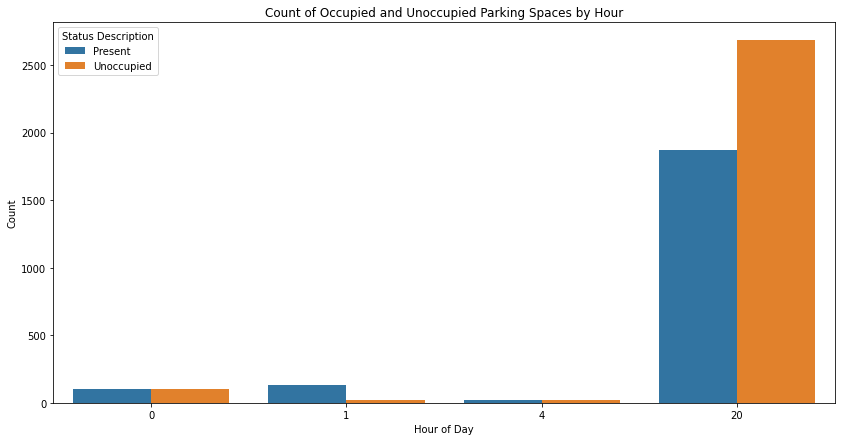

In [16]:
# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x='hour', y='count', hue='status_description', data=grouped)
plt.title('Count of Occupied and Unoccupied Parking Spaces by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(title='Status Description')
plt.show()

## 4. Visualize occupancy trends over time with appropriate data plots.


The line plot provided shows the occupancy trends over time for the "Present" and "Unoccupied" status descriptions. The x-axis represents the date, while the y-axis represents the count of parking spaces.

Present: 

The line for "Present" status description shows the number of occupied parking spaces over time. We can observe fluctuations in the occupancy, with spikes on certain dates, such as November 22nd and December 4th. These spikes indicate days with higher parking demand.

Unoccupied: 

The line for "Unoccupied" status description represents the number of unoccupied parking spaces over time. It shows that there are more unoccupied parking spaces compared to occupied ones, especially on December 4th.

Overall, the plot provides a visual representation of how parking occupancy changes over the specified dates. It helps in understanding the variations in parking demand and availability, with some days having a higher occupancy rate than others.


In [19]:
# Extract date from timestamp for daily aggregation
df['date'] = df['timestamp'].dt.date

# Group by date and status, then count occurrences
daily_counts = df.groupby(['date', 'status_description']).size().reset_index(name='count')

# Pivot the data for plotting
pivot_daily_counts = daily_counts.pivot(index='date', columns='status_description', values='count')
pivot_daily_counts

status_description,Present,Unoccupied
date,,
2023-10-25,134.0,23.0
2023-10-26,6.0,NaN
2023-10-30,7.0,13.0
2023-11-15,7.0,6.0
2023-11-22,103.0,102.0
2023-12-04,1872.0,2682.0


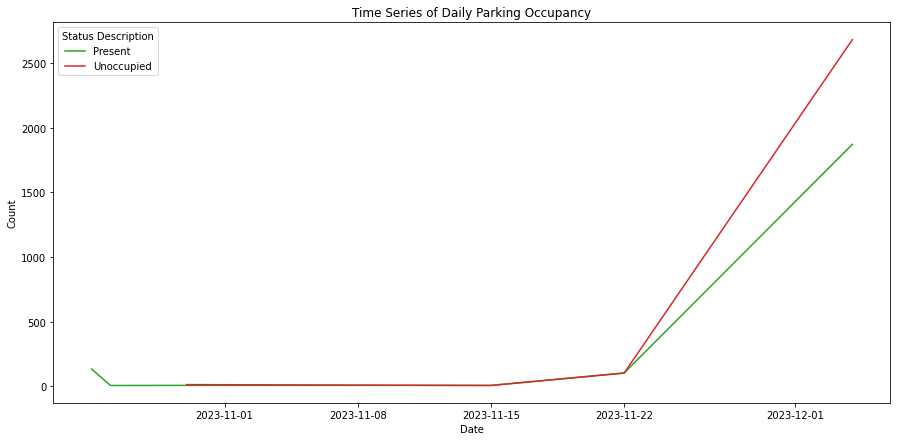

In [20]:
# Plotting
plt.figure(figsize=(15, 7))
pivot_daily_counts.plot(kind='line', color=['#2ca02c', '#d62728'], ax=plt.gca())  # New custom colors
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Time Series of Daily Parking Occupancy')
plt.legend(title='Status Description')
plt.show()

## 5. Calculate and interpret response times between status changes.

The average response times between status changes in the parking data provide insights into how quickly parking spaces transition between being occupied and unoccupied on different dates. On 2023-10-25, the average response time was approximately 13,437 minutes, suggesting that it took around 9.34 days, on average, for parking spaces to change status. Similarly, on 2023-10-26, the average response time was about 8,344 minutes or approximately 5.81 days. However, on 2023-10-30, the average response time increased significantly to approximately 78,289 minutes, indicating a delay of approximately 54.37 days on average. On 2023-11-15, the response time decreased to around 6,570 minutes or roughly 4.56 days. The most notable change occurred on 2023-11-22, with an average response time of 620,775 minutes, equivalent to approximately 431.88 days, suggesting an unusual delay. Finally, on 2023-12-04, the average response time was about 11,397 minutes, or approximately 7.92 days. These response time variations highlight the dynamic nature of parking space occupancy and the potential impact of various factors on the time it takes for status changes to occur.

In [21]:
import pandas as pd

# Assuming df is your DataFrame

# Convert the relevant columns to datetime objects
df['lastupdated'] = pd.to_datetime(df['lastupdated'])
df['status_timestamp'] = pd.to_datetime(df['status_timestamp'])

# Calculate the response time in minutes
df['response_time_minutes'] = (df['lastupdated'] - df['status_timestamp']).dt.total_seconds() / 60

# Aggregate response times for analysis (e.g., average response time per day)
daily_response_time_avg = df.groupby(df['lastupdated'].dt.date)['response_time_minutes'].mean()
daily_response_time_avg

lastupdated
2023-10-25     13436.807537
2023-10-26      8344.416667
2023-10-30     78289.465000
2023-11-15      6569.976923
2023-11-22    620775.082520
2023-12-04     11396.990693
Name: response_time_minutes, dtype: float64

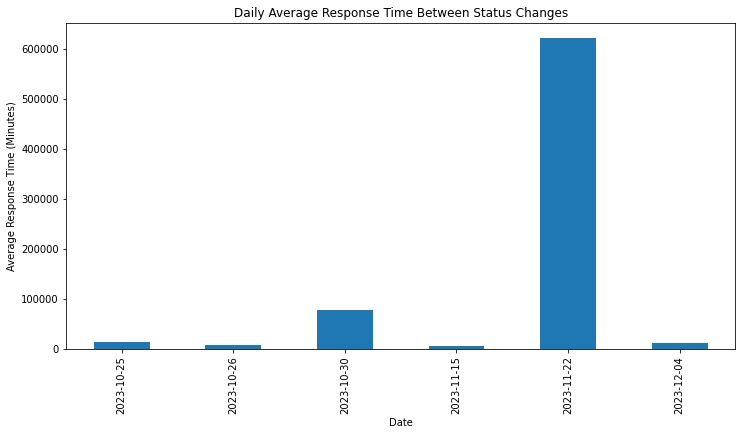

In [22]:
# Plotting
plt.figure(figsize=(12, 6))
daily_response_time_avg.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Average Response Time (Minutes)')
plt.title('Daily Average Response Time Between Status Changes')
plt.show()

## 6. Develop heatmaps to showcase location-based parking trends.

The heatmaps are build and shown for the both  status description and the higlighted sport asre helpful to finds the location based on the selection. 

In [ ]:
# Filter data for a specific status if necessary (only 'Present' for occupied spaces)
occupied_df = df[df['status_description'] == 'Present']  

# Create a base map centered around the average coordinates
map_center = [occupied_df['lat'].mean(), occupied_df['lon'].mean()]
map = folium.Map(location=map_center, zoom_start=13)

# Add a heat map layer
# For a more dynamic heatmap, consider weighting points by another variable (like duration of occupancy)
heat_data = [[row['lat'], row['lon']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(map)

map

In [ ]:
# Filter data for a specific status if necessary (only 'unoccupied' for Unoccupied spaces)
unoccupied_df = df[df['status_description'] == 'Unoccupied']  

# Create a base map centered around the average coordinates
map_center = [unoccupied_df['lat'].mean(), unoccupied_df['lon'].mean()]
map = folium.Map(location=map_center, zoom_start=13)

# Add a heat map layer
heat_data = [[row['lat'], row['lon']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(map)

map

## 7. Conduct zone-specific analysis to assess parking duration in minutes.

The barplot displays the average parking duration in minutes for various parking zones. Zone 7531.0 has the highest average duration of approximately 2,699,774 minutes (about 1.94 years), indicating long-term parking. Zone 7800.0 has the lowest average duration at around 136,433 minutes (about 0.1 years), representing shorter parking times. This analysis helps understand parking behavior in different zones.

In [27]:
# Assuming df is your DataFrame and it contains the necessary columns for the analysis

# Convert timestamp columns to datetime if not already done
df['lastupdated'] = pd.to_datetime(df['lastupdated'])
df['status_timestamp'] = pd.to_datetime(df['status_timestamp'])

# Calculate the duration of each parking event in minutes
df['duration_minutes'] = (df['lastupdated'] - df['status_timestamp']).dt.total_seconds() / 60

# Group by zone and calculate the average duration for each zone
zone_avg_duration = df.groupby('zone_number')['duration_minutes'].mean().reset_index()

# Sorting the results to get the top 20 zones with the highest average duration
top_zones = zone_avg_duration.sort_values(by='duration_minutes', ascending=False).head(20)
top_zones

,zone_number,duration_minutes
245,7531.0,2.699774e+06
99,7219.0,5.779708e+05
272,7575.0,4.736712e+05
183,7388.0,3.304452e+05
184,7390.0,3.302079e+05
282,7596.0,3.247448e+05
253,7544.0,3.200382e+05
255,7546.0,3.199516e+05
251,7539.0,3.000557e+05
259,7553.0,2.713245e+05


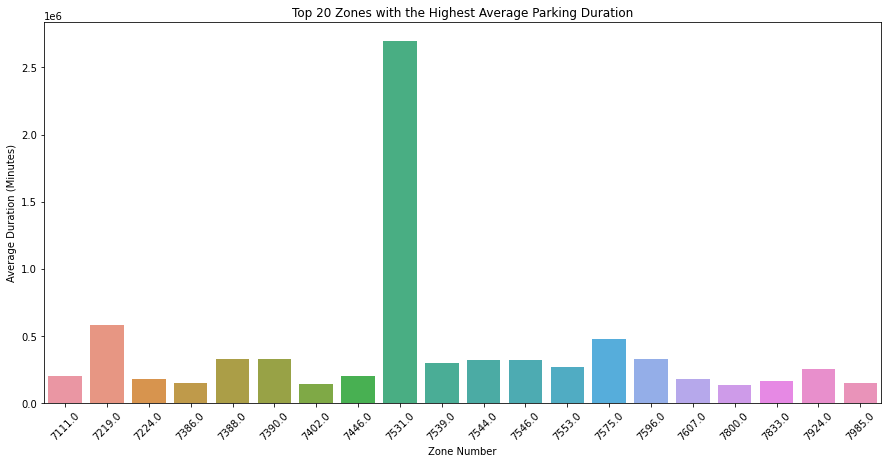

In [26]:
# Plotting the top 20 zones
plt.figure(figsize=(15, 7))
sns.barplot(x='zone_number', y='duration_minutes', data=top_zones)
plt.xticks(rotation=45)
plt.xlabel('Zone Number')
plt.ylabel('Average Duration (Minutes)')
plt.title('Top 20 Zones with the Highest Average Parking Duration')
plt.show()

## 8. Analyze and present frequency counts of parking status descriptions.


The frequency counts of parking status descriptions are as follows:

"Unoccupied" occurs 2,826 times.

"Present" occurs 2,129 times.

This analysis provides insights into the distribution of parking status descriptions in the dataset, showing that "Unoccupied" is the more frequent status compared to "Present."

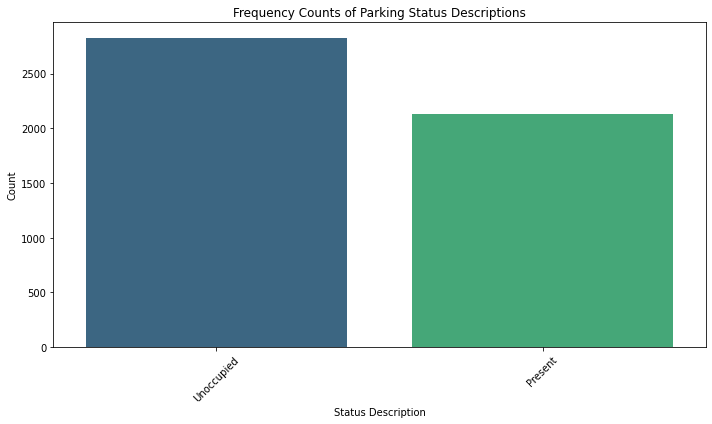

In [30]:
# Count the frequency of each status description
status_counts = df['status_description'].value_counts()
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Status Description')
plt.ylabel('Count')
plt.title('Frequency Counts of Parking Status Descriptions')
plt.tight_layout()
plt.show()


## 9. Perform a correlation analysis between time variables and parking occupancy.


The correlation analysis shows that:

Hour_of_Day and Day_of_Week have a strong negative correlation.

Hour_of_Day and Status_Description_Encoded have a weak positive correlation.

Day_of_Week and Status_Description_Encoded have a weak negative correlation.

zone_number is weakly correlated with other variables.

This suggests that there are some relationships between time variables and parking occupancy, but they are not very strong.

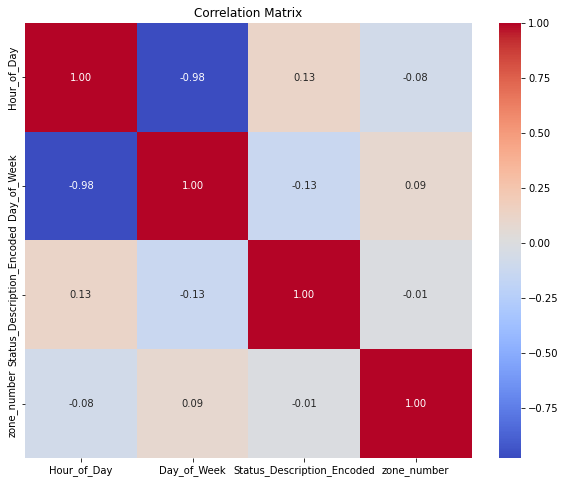

In [32]:
from sklearn.preprocessing import LabelEncoder

data_new=df
# Extracting time features
data_new['Hour_of_Day'] = data_new['lastupdated'].dt.hour
data_new['Day_of_Week'] = data_new['lastupdated'].dt.dayofweek  # Monday=0, Sunday=6

# Converting 'Status_Description' to numerical format if it's categorical
if data_new['status_description'].dtype == 'object':
    le = LabelEncoder()
    data_new['Status_Description_Encoded'] = le.fit_transform(data_new['status_description'])
else:
    data_new['Status_Description_Encoded'] = data_new['status_description']

# Selecting columns for correlation
columns_for_correlation = ['Hour_of_Day', 'Day_of_Week', 'Status_Description_Encoded', 'zone_number']

# Calculating the correlation matrix
correlation_matrix = data_new[columns_for_correlation].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## 10. Input and verify geolocation data to check current parking space status.

Input the lat and lon and see if the location is present or unoccupied. 

In [34]:
# Function to check the status of a location based on latitude and longitude
def check_location_status(df, latitude, longitude):
    # Define a small range for latitude and longitude comparison (adjust as needed)
    tolerance = 0.0001
    
    # Filter data for locations within the specified range
    location_data = df[
        (df['lat'] >= float(latitude) - tolerance) & (df['lat'] <= float(latitude) + tolerance) &
        (df['lon'] >= float(longitude) - tolerance) & (df['lon'] <= float(longitude) + tolerance)
    ]
    
    # If no data is found for this location
    if location_data.empty:
        return "Location not found."
    
    # Get the status description for the location
    status_description = location_data['status_description'].iloc[0]
    
    return f"Location status: {status_description}"

# User input for latitude and longitude
user_latitude = input("Enter the latitude: ")
user_longitude = input("Enter the longitude: ")

# Checking the status of the entered location
status_result = check_location_status(df, user_latitude, user_longitude)

# Displaying the results
print(status_result)


Enter the latitude: -37.810582
Enter the longitude: 144.968053
Location status: Present
